In [85]:
import ast
import numpy as np
import pandas as pd

results = pd.read_csv('results.csv')
results['board'] = results['board'].apply(ast.literal_eval)
results['board'] = results['board'].apply(np.array)
results.head()

,num_attacks,board
0,57,"[[None, None, None, None, None, None, None, No..."
1,30,"[[None, None, None, None, None, None, None, No..."
2,42,"[[None, None, None, None, None, None, Cruiser,..."
3,46,"[[None, None, None, None, None, None, None, No..."
4,53,"[[None, None, None, None, None, None, None, No..."


In [86]:
difficult_boards = results.sort_values('num_attacks').tail()['board']
print('Difficult Boards:\n')
for board in difficult_boards:
    for col in board:
        print(col)
    print()

Difficult Boards:

[None None None None None None None None None None]
['Battleship' None None None None None None None None None]
['Battleship' None None None None None None None None None]
['Battleship' None None None None None None None None None]
['Battleship' None None None None None None 'Cruiser' None None]
[None 'Submarine' None None None None None 'Cruiser' None None]
['Destroyer' 'Submarine' None None None None None 'Cruiser' None None]
['Destroyer' 'Submarine' None None None None None None None None]
[None None None None None None None None None None]
[None None None 'Aircraft_Carrier' 'Aircraft_Carrier' 'Aircraft_Carrier'
 'Aircraft_Carrier' 'Aircraft_Carrier' None None]

[None None None None None None None None None None]
[None None None None None None None None None None]
[None None None None None 'Aircraft_Carrier' 'Aircraft_Carrier'
 'Aircraft_Carrier' 'Aircraft_Carrier' 'Aircraft_Carrier']
[None None None None None 'Submarine' None None None None]
[None None 'Battleshi

Text(0.5, 1.0, 'Number of Attacks to Sink All Ships')

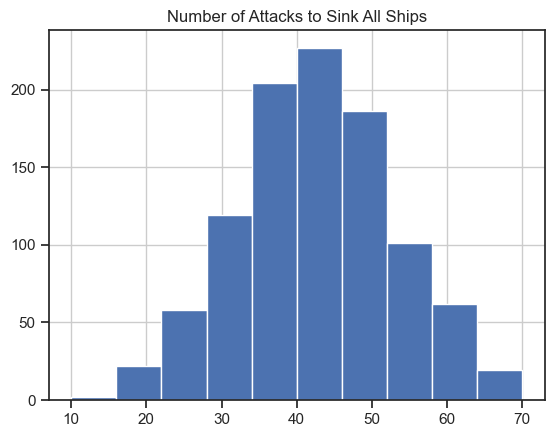

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('notebook')
sns.set_style('ticks')
results['num_attacks'].hist()
plt.title('Number of Attacks to Sink All Ships')

In [88]:
X = results['board']
results['is_difficult'] = (results['num_attacks'] >= 60)
y = results['is_difficult']
X

0      [[None, None, None, None, None, None, None, No...
1      [[None, None, None, None, None, None, None, No...
2      [[None, None, None, None, None, None, Cruiser,...
3      [[None, None, None, None, None, None, None, No...
4      [[None, None, None, None, None, None, None, No...
                             ...                        
995    [[None, None, None, None, None, None, None, No...
996    [[None, None, None, None, None, None, None, No...
997    [[None, None, None, None, None, None, None, No...
998    [[None, None, None, None, None, None, None, No...
999    [[None, None, None, None, None, None, None, De...
Name: board, Length: 1000, dtype: object

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

71     [None, None, None, Aircraft_Carrier, None, Non...
183    [None, Destroyer, Destroyer, None, None, None,...
201    [None, None, None, None, None, None, None, Non...
31     [None, None, None, None, None, None, None, Non...
594    [None, None, Submarine, Submarine, Submarine, ...
                             ...                        
152    [None, Battleship, None, None, None, None, Non...
13     [None, None, None, None, None, None, None, Non...
763    [None, None, None, Destroyer, Destroyer, None,...
921    [None, None, None, None, None, None, None, Non...
391    [None, None, None, None, None, None, None, Non...
Name: board, Length: 700, dtype: object

In [83]:
from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(X_train, y_train)

ValueError: setting an array element with a sequence.